In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt

In [8]:
CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('Data','Process','data.csv')

-------

# Upload process data

In [9]:
df = pd.read_csv(str(DATA_DIR), index_col=0)
df.shape

(768, 9)

First, let's separete the dataset into X (input features) and y (target variable)

In [10]:
X = df.loc[:,df.columns!='Outcome']
y = df.loc[:,'Outcome']

Then, make the first split to split the data into the training set (80%) and the testing set (20%) according to the preceding diagram

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Finally, make the second split to create the final training set and the validation set:

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [13]:
X.shape[0]

768

In [14]:
X_train.shape[0]+X_val.shape[0]+X_test.shape[0]
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
298,3.015679,-0.713002,0.462823,-0.472774,3.348618e-01,0.602930,-0.180834,1.085644
424,1.233880,0.963740,0.462823,0.324019,6.408675e-01,1.519871,0.133259,0.234767
212,0.936914,1.884304,1.869121,0.210192,-3.345079e-16,0.253619,-0.929823,2.276873
687,-0.844885,-0.482861,-1.853434,-1.155739,-3.345079e-16,-0.605103,-0.878481,-0.360847
736,-1.141852,0.141808,1.124610,-0.245119,-4.183830e-01,-0.736094,0.130239,-1.041549
...,...,...,...,...,...,...,...,...
573,-0.547919,-0.778757,-1.026200,-1.383394,-4.183830e-01,0.326392,-0.827139,-0.956462
318,-0.250952,-0.219843,-0.529859,1.120812,-1.829940e-01,0.821249,-0.972105,-0.445935
45,-1.141852,1.917182,-0.529859,1.120812,-3.345079e-16,1.388879,4.291962,-0.701198
617,-0.547919,-1.765076,-0.860753,-1.838705,-1.654175e+00,-1.798581,-0.648952,-0.871374


-----

# Model architecture

For this project, we will use two hidden layers in our MLP

## Input Layer

Each node in the input layer refers to each feature in the data set. Since there are eight features in the Pima Indians dataset, there should be eight nodes in the input layer of our MLP

## Hidden layers

The next layer after the input layer is known as a **hidden layer**. This take the input layer and applies a **non-linear activation function** to it.

$$ \textrm{Output from hidden layer} = \sigma (W x + n) $$

where $x$ refers to the input passed from the previous layer, $\sigma$ refers to the non-linear activation function, $W$ are the weights, and $b$ refers to the bias

## Activation functions

In this project, we will use the **rectified linerar unit (ReLU)** and the **sigmoid** as our activation models

### ReLu

Mathematically, we can represent ReLU as follows:

$$ f(x) = max(0,x) $$ 

### Sigmoid activation function

$$ f(x)  = \frac{1}{1+e^{-x}} $$

-----

# Model building in Python using Keras

## Model building

Let's create a new `Sequential()` clas


In [15]:
model = Sequential()

2023-06-23 08:43:25.934184: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Let's add the first hidden layer:

In [16]:
from keras.layers import Dense

# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=8))

Let's add our second hidden layer:

In [17]:
# Add the second hidden layer
model.add(Dense(16, activation='relu'))

Now we add the output layer as follows:

In [18]:
model.add(Dense(1,activation='sigmoid'))

## Model compilation

Before we start training our model, we need to define the parameters of the training process, which is done via the compile method.

Thus:

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model training

To train our MLP model defined in earlier steps, let's call the `fit` function. Let's train our model for 200 iterations:

In [20]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=400)

Epoch 1/400


16/16 [==============================] - 2s 9ms/step - loss: 0.6658 - accuracy: 0.6497
Epoch 2/400
16/16 [==============================] - 0s 13ms/step - loss: 0.5973 - accuracy: 0.7149
Epoch 3/400
16/16 [==============================] - 0s 13ms/step - loss: 0.5476 - accuracy: 0.7251
Epoch 4/400
16/16 [==============================] - 0s 18ms/step - loss: 0.5142 - accuracy: 0.7454
Epoch 5/400
16/16 [==============================] - 0s 13ms/step - loss: 0.4904 - accuracy: 0.7556
Epoch 6/400
16/16 [==============================] - 0s 10ms/step - loss: 0.4748 - accuracy: 0.7556
Epoch 7/400
16/16 [==============================] - 0s 6ms/step - loss: 0.4653 - accuracy: 0.7556
Epoch 8/400
16/16 [==============================] - 0s 12ms/step - loss: 0.4568 - accuracy: 0.7637
Epoch 9/400
16/16 [==============================] - 0s 21ms/step - loss: 0.4507 - accuracy: 0.7658
Epoch 10/400
16/16 [==============================] - 0s 7ms/step - loss: 0.4466 - accuracy: 0.7658
Epoch 11/400
1

-----

# Results analysis

Having succesfully trained our MLP, let's evaluate our model based on the testing accuracy. confusion matrix and **receiver operating characteristic (ROC)** curve

## Test accuracy
We can evaluate our model on the training set and testing set using the `evalute()` function:

In [21]:
scores = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {scores[1]*100: .2f}')

16/16 [==============================] - 1s 20ms/step - loss: 0.0700 - accuracy: 0.9919
Training Accuracy:  99.19


In [22]:
scores = model.evaluate(X_test, y_test)
print(f'Training Accuracy: {scores[1]*100: .2f}')

5/5 [==============================] - 0s 28ms/step - loss: 1.5475 - accuracy: 0.6883
Training Accuracy:  68.83


## Confusion matrix

The confusion matrix is a useful visualization tool that provides analysis on the true negativa, false positive, false negative and true positives made by our model.

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [24]:
y_test_pred = model.predict(X_test)
y_test_pred=np.where(y_test_pred> 0.5, 1,0)

5/5 [==============================] - 0s 24ms/step


In [25]:
c_matrix = confusion_matrix(y_test, y_test_pred)

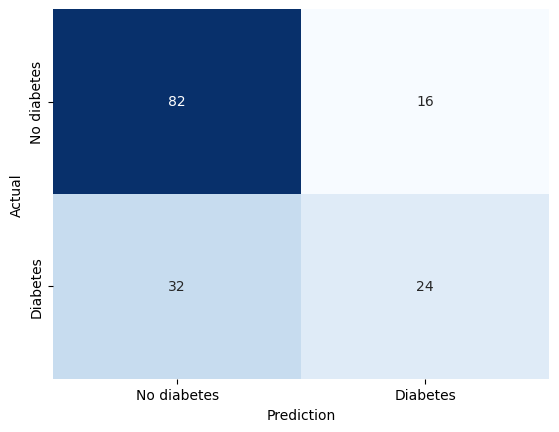

In [26]:
fig, ax1 = plt.subplots()
sns.heatmap(
    data = c_matrix,
    annot=True,
    xticklabels=['No diabetes','Diabetes'],
    yticklabels=['No diabetes','Diabetes'],
    cbar = False,
    cmap='Blues',
    ax = ax1
)

ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
plt.show()

## ROC curve

The ROC curve is a plot with the **True Positive Rate (TPR)** on the $y$ axis and the **False positive Rate (FPR)** on the $x$ axis. TPR and FPR are defined as follows:

$$ \textrm{True positive Rate} = \frac{\textrm{True Positive}}{\textrm{True positive} + \textrm{False Negative}} $$

$$ \textrm{False positive Rate} = \frac{\textrm{False Positive}}{\textrm{True Negative} + \textrm{False Positive}} $$


In [27]:
from sklearn.metrics import roc_curve

In [28]:
y_test_pred_probs = model.predict(X_test)

5/5 [==============================] - 0s 17ms/step


In [29]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

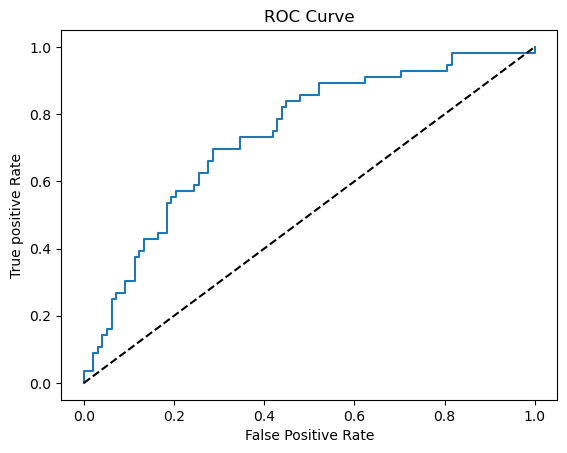

In [30]:
fig, ax = plt.subplots()
ax.plot(FPR, TPR)
ax.plot([0,1],[0,1],
        linestyle='--',
        color='black')
plt.title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True positive Rate')
plt.show()

> we have designed and implemented an MLP that is capable of predicting the onset of diabetes with ~80% accuracy.